In [2]:
import pandas as pd

In [3]:
### Read the Datasets

df = pd.read_excel("diabetes.xlsx", sheet_name = "diabetes")
print(df)

        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunct

In [4]:
### A group of medical staff said that BMI is a main factor in Diabetes Outcomes. 
### However, as a Data Analyst, I could not accept that since there was no evidence

### As the Target variable has two values, "0" for non-diabetic and "1" for diabetic, the two-sample T-test is a great way to make my T-Test analysis.
### I wanted to run a Two-sample t-test to analyze the difference in BMI group means

In [5]:
### I would need to do EDA before running a two- sample T- Test.

In [6]:
### Look at missing values
print(df.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
### Count the number of Columns

num_columns = df.shape[1]
print(f"Number of Columns:{num_columns}")

Number of Columns:10


In [8]:
### Look at the data types of the "Diabetes" datasets
print(df.dtypes)

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [9]:
### Remove ID columns and Target column "Outcome"
df1 = df.drop(columns = ['Id','Outcome'])
print(df1)              

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [10]:
### Statistical summary
print(df1.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age  
count  2768.000000               2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225  
std       8.076127                  0.325669    11.777230  
min       0.000000                  0.078000    21.000000

In [11]:
### For some variables, even if there are no missing values, it does NOT make sense to have 0 as a value.
### In Variables such as Glucose, BloodPressure, SkinThickness, Insulin, BMI
### To have a minimum value equal to 0, it means there are no records 
### The best way to resolve that issue, it is to replace those 0 values by the Mean for each variable 

In [12]:
### Variables to replace 0 Values by Mean
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    non_zero_mean = df.loc[df[col] !=0, col].mean()
    df.loc[df[col] == 0, col] = non_zero_mean

C:\Users\claud\AppData\Local\Temp\ipykernel_38120\1451741017.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.89527272727273' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = non_zero_mean
C:\Users\claud\AppData\Local\Temp\ipykernel_38120\1451741017.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40408626560726' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = non_zero_mean
C:\Users\claud\AppData\Local\Temp\ipykernel_38120\1451741017.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.289634146341463' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df

In [13]:
### Re-check the Statistical summary to see if we do not have the 0 values in the cols to replace
print(df.describe())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.895273      72.404086      29.289634   
std     799.197097     3.323801    30.500960      11.988255       9.031265   
min       1.000000     0.000000    44.000000      24.000000       7.000000   
25%     692.750000     1.000000    99.000000      64.000000      25.000000   
50%    1384.500000     3.000000   118.000000      72.000000      29.289634   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean    154.237830    32.596665                  0.471193    33.132225   
std      81.678056     7.103424                  0.325669    11.777230   
m

In [14]:
### Descriptive analytics
### Check if the dataset is a balanced or imbalanced dataset
### I will need to plot the Outcome variable and see the counts for each category

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

print(df['Outcome'].value_counts())

Outcome
0    1816
1     952
Name: count, dtype: int64


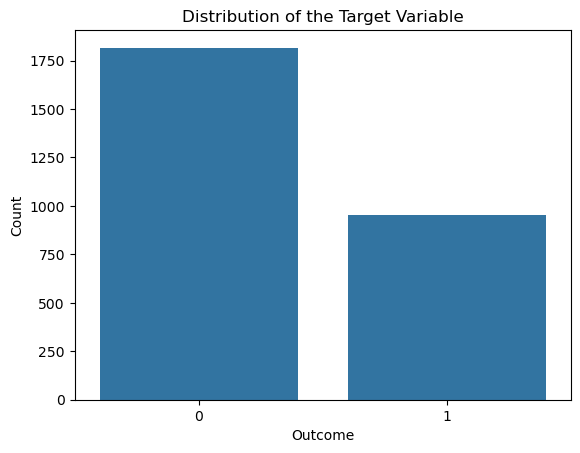

In [16]:
### Plot the distribution of Outcome variable

sns.countplot(x='Outcome', data=df)
plt.title("Distribution of the Target Variable")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

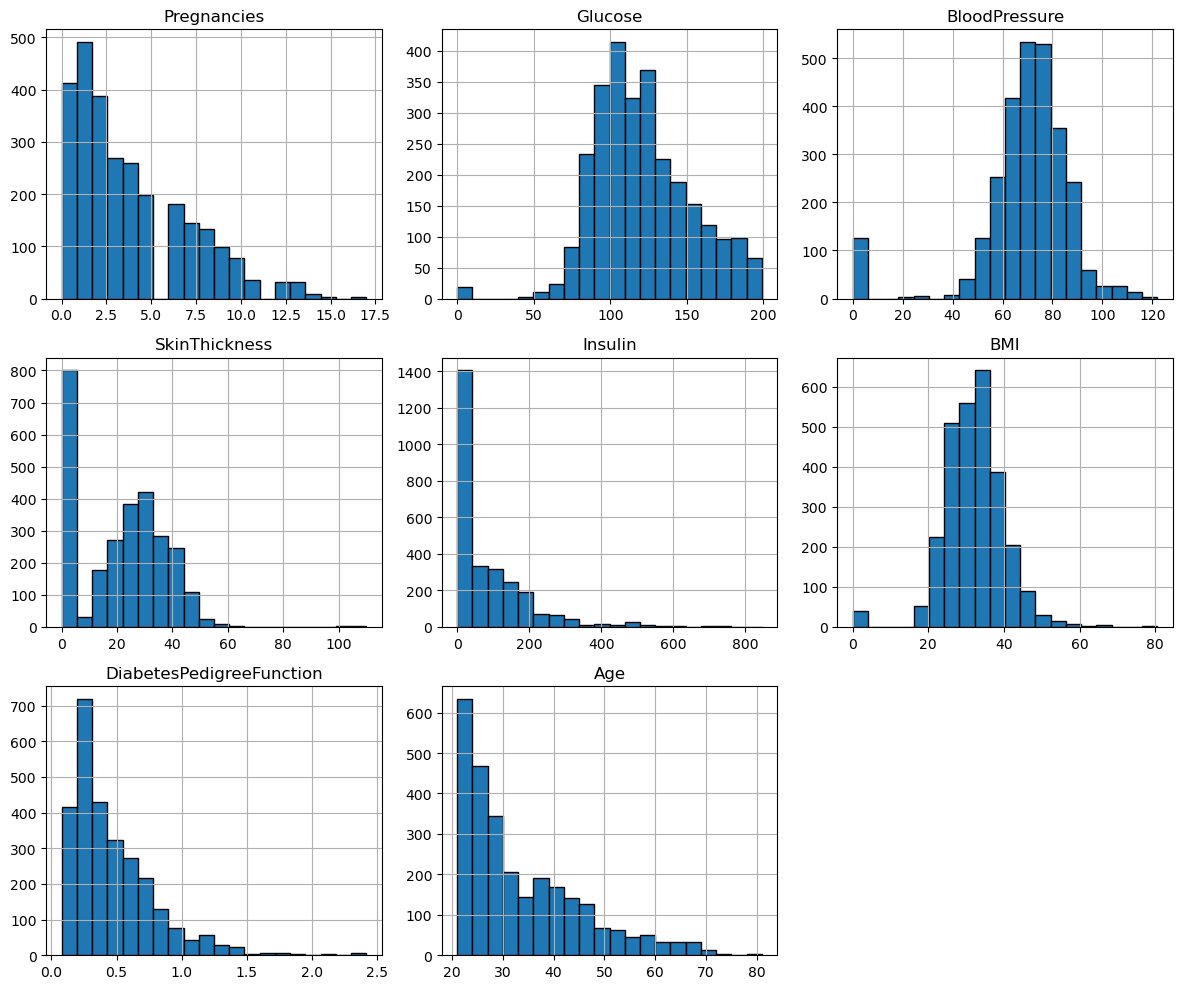

In [17]:
### Plot an Histogram to plot all numerical variables

df1.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [18]:
### Check if the dataset has numerical variables

print(df1.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


In [19]:
### Plot the Correlation matrix
### Recall that the Correlation matrix is only for numerical variables (Categorical variables being excluded)

corr_matrix = df1.corr()
print(corr_matrix.shape)

(8, 8)


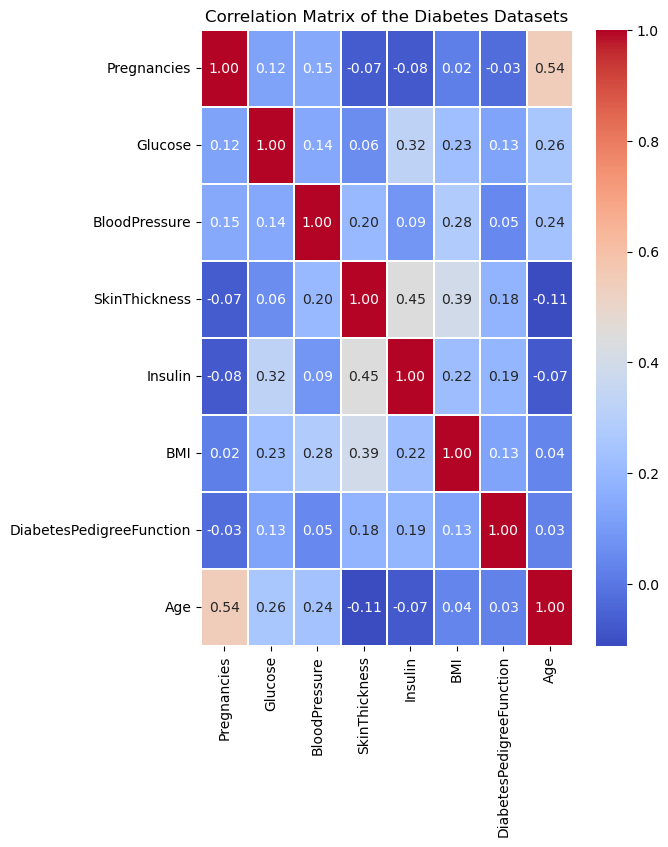

In [20]:
### Plot the Heatmap of the Correlation Matrix
plt.figure(figsize=(6,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.05)
plt.title("Correlation Matrix of the Diabetes Datasets")
plt.show()           

In [ ]:
### After doing EDA, the first thing to do is to create two groups of BMI based on the Outcome Variable of the Diabetes Datasets
### Group 1 BMI, Patients with Diabetes 
### Group 2 BMI, Patients with No Diabetes.

In [75]:
import scipy.stats as stats

In [76]:
BMI_Diabetes = df[df["Outcome"] == 1]["BMI"]
BMI_NoDiabetes = df[df["Outcome"] == 0]["BMI"]
                

In [77]:
### Ask Jesse or Emily King if it is necessary to check the normality or homogeneity of BMI
### However, based on my search, skipping assumptions checks means I rely on the robustness of the T-test.
### From a large sample size, the T-Test can be robust to moderate departures from normality.
### However, if variances differ greatly or if your sample sizes are small, results may be less reliable.

In [78]:
### Check the Normality Distribution of BMI Variable by running the Shapiro- Wilk Test

stat1, p1 = stats.shapiro(BMI_Diabetes)
stat2, p2 = stats.shapiro(BMI_NoDiabetes)
print(f"Normality test p-values: Diabetes Group = {p1}, No Diabetes Group = {p2}")

Normality test p-values: Diabetes Group = 5.098008918926273e-18, No Diabetes Group = 1.3501432488430415e-22


In [79]:
### With Normality p_values, the p_values are very small which means the Normality is violated
### To resolve the issue, if the dataset is too large, we can move forward with the T-test but mention the Non-Normality in the datasets.

### But if the datasets is small, we use the non- parametric statistic function for this Independent(two-samples) T- Test which is Mann- Whitney U Test

### We perform the T-test regardless of the Normality & the T-Test with a nonparametric statistical test

In [80]:
### Two- samples( Independent) T-test regardless Normality

t_stat, p_value = stats.ttest_ind(BMI_Diabetes, BMI_NoDiabetes, equal_var=False)
print(f"T-Statistic:{t_stat}, p_value:{p_value}")

T-Statistic:16.029384044704187, p_value:1.9511266276520716e-54


In [81]:
### Two- samples(Independent) T-test considering that the distribution is NOT normal
### Use the nonparametric statistical test which is Mann Whitney U Test

### Recall that the Mann-Whitney U Test compares distribution between two groups(=one group tends to have higher or lower values than the other)

u_stat, p_mannwhitney = stats.mannwhitneyu(BMI_Diabetes, BMI_NoDiabetes, alternative='two-sided')
print(f"Mann Whitney U :{u_stat}, p_value:{p_mannwhitney}")

Mann Whitney U :1176215.5, p_value:6.096221175024377e-55


In [82]:
### Interpretation of results after Normality check:
alpha = 0.05
if p_value < 0.05:
    print("There is a statistically significant difference between BMI Diabetes & BMI-Non Diabetes")
else:
    print("There is not a statistically significant difference between BMI Diabetes & BMI-Non Diabetes")

There is a statistically significant difference between BMI Diabetes & BMI-Non Diabetes


In [83]:
### Since p_value is < 0.05, we reject the Null Hypothesis( which stands that there is no effect or no difference between groups)
### Therefore, I conclude that there is a statistically significant difference in BMI Diabetes and BMI Non-Diabetes

In [84]:
### Check the Homogeneity of the BMI,
### That means the variance of the data in each group of Diabetes is similar
### If after running the p_levene, we find that p_value > 0.05, that means the homogeneity is confirmed as an existing assumption i.e equal_var= True
### if not equal_var= False because p_levene value is < 0.05

stat_levene, p_levene = stats.levene(BMI_Diabetes, BMI_NoDiabetes)
print(f"Levene's test p-value:{p_levene}")

Levene's test p-value:0.020069785312812064


In [85]:
### Because the homogeneity is violated(p_levene < 0.05), I should use "Welch's T-Test" which does not assume the Homogeneity
### The condition of equal_var will be set in the function to "False"

In [86]:
equal_var = p_levene > 0.05

t_stat, p_value = stats.ttest_ind(BMI_Diabetes, BMI_NoDiabetes, equal_var=False)
print(f"T-Statistic: {t_stat}, p_value: {p_value}")

T-Statistic: 16.029384044704187, p_value: 1.9511266276520716e-54


In [87]:
### Interpret the p-value from the condition when equal_var is equal to False

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in BMI between Diabetic and Non- Diabetic groups; hence the two groups are different.")
else:
    print("There is not a statistically significant difference in BMI between Diabetic and Non- Diabetic groups: hence the two groups are similar.")



There is a statistically significant difference in BMI between Diabetic and Non- Diabetic groups; hence the two groups are different.


In [ ]:
### With the result of p-value, the Null Hypothesis, which stands that there is no difference between the means of those two groups, has been rejected
### since the p-value is small and less than 0.05, 
### Therefore, I can conclude that there is a statistically significant difference between the means of BMI Diabetic and BMI Non- Diabetic.

### There is an effect of BMI on Diabetes Outcome( Diabetic & Non- Diabetic)
### BMI likely affects Diabetes Outcome.

In [ ]:
### After presenting my result to the Medical Staff, another discussion arose
### One group of medical staff said that Diabetic patients have a BMI equal to 30

### That could be true, however, a Data Analyst needs to provide evidence and present the stakeholders data- based evidence.

### With this assumption, it was important for me to run another T- Test which was One sample T-test.

In [ ]:
### Null Hypothesis : The mean BMI of Diabetic patients is equal to 30
### Hypothesis 1: The mean BMI of Diabetic patients is significantly different from 30.

In [ ]:
### Recall that One Sample T- test is a statistical test used to measure if the means of one group sample is different from a standard value

### With that, I need to filter one group sample which will be a sample of Diabetic patients.

In [89]:
### Filter Diabetic Patients Datasets

Diabetic_BMI = df[df["Outcome"] == 1]["BMI"]
print(Diabetic_BMI)

0       33.6
2       23.3
4       43.1
6       31.0
8       30.5
        ... 
2754    29.9
2759    30.8
2760    35.4
2764    32.7
2766    67.1
Name: BMI, Length: 952, dtype: float64


In [95]:
### Run the One- Sample T-Test

from scipy.stats import ttest_1samp

In [96]:
t_stat, p_value = ttest_1samp(Diabetic_BMI,30)

In [97]:
### Show the result of One-sample T-test

print(f"T-Statistics:{t_stat}")
print(f"P-Value:{p_value}")
      

T-Statistics:24.99203735357205
P-Value:2.248997995678484e-106


In [101]:
### Interpret the results
alpha = 0.05

if p_value < 0.05:
    print("There is a statistically significant difference with the mean of BMI equal to 30 for Diabetics patients.")
else:
    print("There is not a statistically significant difference with the mean of BMI equal to 30 for Diabetics patients.")

There is a statistically significant difference with the mean of BMI equal to 30 for Diabetics patients.


In [ ]:
### As a conclusion, the Null Hypothesis is rejected 

In [ ]:
### The Mean of BMI for Diabetic patients is not equal to 30. 

In [ ]:
### The Manager of Diabetic Diagnosis Center came up with another question
### She was looking to predict the Diabetes outcome or the likelihood of having Diabetes for new patients.
### (i.e, the probability of diagnosing new Diabetic patients in future)

In [ ]:
### From this business question, we want to predict the import class 1, which is Diabetic, for future patients

In [112]:
### Determine the Predictor variables vs the Outcome variable for the Decision Tree Model

x = df.drop(columns=['Id','Outcome'])
y = df['Outcome']

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
### Partition the datasets
### Train Partition 60% vs Test Partition 40%
### We use random_state equal to 42 as a set.seed because we want the train & test data to be reproducible anytime we run the model
### 42 is an arbirtrary choice, we can even choose 100 or 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [138]:
### Print Training & Testing Datasets after partitioning

print(f"Training Sample:{x_train.shape[0]}, Testing Sample:{x_test.shape[0]}")

Training Sample:1660, Testing Sample:1108


In [121]:
### Train the Decision Tree Model

DiabetesTree_Model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
DiabetesTree_Model.fit(x_train, y_train)                                            

DecisionTreeClassifier(max_depth=4, random_state=42)

In [122]:
### Make Prediction
y_pred = DiabetesTree_Model.predict(x_test)

In [123]:
### Evaluate the performance
accuracy = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"The Model Accuracy Rate:{accuracy:.2f}")
print("\nConfusionMatrix:\n", confusion_matrix)
print("\nClassification Report:\n", class_report)

The Model Accuracy Rate:0.78

ConfusionMatrix:
 [[594 138]
 [103 273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       732
           1       0.66      0.73      0.69       376

    accuracy                           0.78      1108
   macro avg       0.76      0.77      0.76      1108
weighted avg       0.79      0.78      0.78      1108



In [ ]:
### Recall that the Positive Class(i.e. Important class is 1- Diabetics)
### While the Negative Class(i.e. Non-important class is 0- Non-Diabeics)

### From the Classification Tree Model, we have:

### True Negative(TN) = 594 (Correctly predicted 0: Non- Diabetics)
### False Positive(FP) = 138 (Incorrectly predicted 1: Diabetics while they are 0: Non-Diabetics)
### False Negative(FN) = 103 (Incorrectly predicted 0: Non-Diabetics while they are 1: Diabetics)
### True Positive(TP) = 273 (Correctly predicted 1: Diabetics)

In [136]:
### Compute Sensitivity & Specificity

### Sensitivity = TP/ (TP+FN) & Specificity = TN/ (TN+FP)

### Extract TN, FP, FN, TP from Confusion Matrix

TN, FP, FN, TP = confusion_matrix.ravel()

In [137]:
Sensitivity = TP/ (TP+FN)
print(f"Sensitivity(Recall):{Sensitivity:.2f}")

Specificity = TN/ (TN+FN)
print(f"Specificity:{Specificity:.2f}")

Sensitivity(Recall):0.73
Specificity:0.85


In [ ]:
### From the results of Sensitivity and Specificity, I would say that for future records/ patients
### This Decision Tree Model gives us the ability to diagnose successfully Diabetic patients at 73% 
### while the ability to diagnose successfully Non- Diabetic patients is at 85%

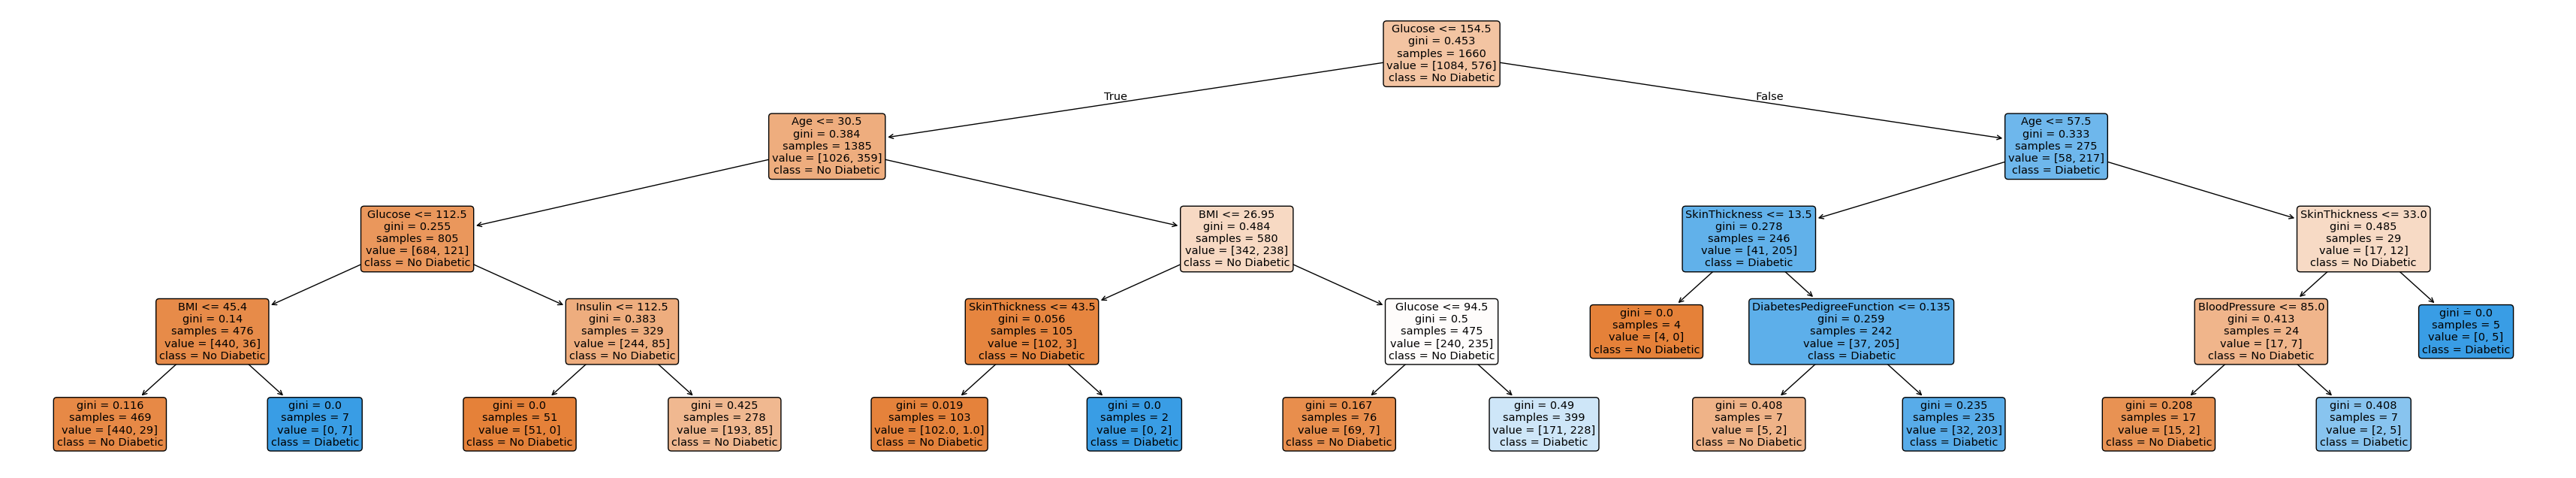

In [134]:
### Plotting the Decision Tree Model

plt.figure(figsize=(44, 8))
plot_tree(DiabetesTree_Model, feature_names=x.columns, class_names=["No Diabetic","Diabetic"], filled=True, rounded=True)
plt.show()

In [ ]:
### As I am not satisfied about the ability to diagnose the Diabetic patients,
### I would love to run another classification model which is Logistic Regression Model.

### The logistic Regression model will help me to determine the probability of diagnosing Diabetic patients in the future. 

In [149]:
### With the logistic Regression, I will rename the Predictor and Outcome variables to avoid conflict with Decision Tree

z = df.drop(columns = ['Id','Outcome'])
p = df['Outcome']

In [151]:
### Partition the datasets for Logistic Regression Model

z_train, z_test, p_train, p_test = train_test_split(z,p, test_size=0.4, random_state=42)
print(f"Training Sample:{z_train.shape[0]}, Testing Sample:{z_test.shape[0]}")

Training Sample:1660, Testing Sample:1108


In [152]:
### As the Predictor Variables are not on the same scale, I need to standardize them before building the Logistic Regression

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Transform training set and testing

z_train = scaler.fit_transform(z_train)
z_test = scaler.transform(z_test)


In [153]:
### Train the logistic Regression with all predictor variables

from sklearn.linear_model import LogisticRegression
DiabetesLegit_Model = LogisticRegression()
DiabetesLegit_Model.fit(z_train, p_train)

LogisticRegression()

In [156]:
### Make Prediction on Testing Datasets

p_pred = DiabetesLegit_Model.predict(z_test)

In [157]:
### Evaluate the performance of the Logistic Regression model

from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(p_test, p_pred)
cm = confusion_matrix(p_test, p_pred)
report = classification_report(p_test, p_pred)

print(f"Accuracy Rate:{accuracy:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy Rate:0.77
Confusion Matrix:
 [[661  71]
 [181 195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       732
           1       0.73      0.52      0.61       376

    accuracy                           0.77      1108
   macro avg       0.76      0.71      0.72      1108
weighted avg       0.77      0.77      0.76      1108



In [ ]:
### The Sensitivity with the Logistic Regression is equal to 52%
### This is very low and the Medical Staff can NOT rely on this Model to classify future outcome and especially classify Diabetic Patients.
### Assume that the Doctor discusses further with the Data Analyst and they agree to reduce the predictor variables 

### Glucose, BMI, SkinThickness, Insulin, Blood Pressure are non New Predictors

In [161]:
df_selected = df[['Glucose','BMI','SkinThickness','Insulin','BloodPressure','Outcome']]
z1 = df.drop(columns = ['Outcome'])
p1 = df['Outcome']

In [162]:
### Partition the datasets for Logistic Regression Model

z1_train, z1_test, p1_train, p1_test = train_test_split(z1,p1, test_size=0.4, random_state=42)
print(f"Training Sample:{z1_train.shape[0]}, Testing Sample:{z1_test.shape[0]}")

Training Sample:1660, Testing Sample:1108


In [163]:
### As the Predictor Variables are not on the same scale, I need to standardize them before building the Logistic Regression

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Transform training set and testing

z1_train = scaler.fit_transform(z1_train)
z1_test = scaler.transform(z1_test)

In [164]:
### Train the logistic Regression with the selected predictor variables

from sklearn.linear_model import LogisticRegression
DiabetesLegit_Model = LogisticRegression()
DiabetesLegit_Model.fit(z1_train, p1_train)

LogisticRegression()

In [165]:
### Make Prediction on Testing Datasets

p1_pred = DiabetesLegit_Model.predict(z1_test)

In [166]:
### Evaluate the performance of the Logistic Regression model

from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(p1_test, p1_pred)
cm = confusion_matrix(p1_test, p1_pred)
report = classification_report(p1_test, p1_pred)

print(f"Accuracy Rate:{accuracy:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy Rate:0.78
Confusion Matrix:
 [[663  69]
 [180 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       732
           1       0.74      0.52      0.61       376

    accuracy                           0.78      1108
   macro avg       0.76      0.71      0.73      1108
weighted avg       0.77      0.78      0.76      1108



In [ ]:
### Using less predictor variables, the Logistic Regression does not provide an improvement in its performance
### The Sensitivity still being 52%

### As a Data Analyst, I will suggest the Medical Staff in the Diabetes Department to use the Decision Tree Model 
### as a perfect classification model for a non- linear datasets